In [11]:
import scipy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import tensorflow as tf
import os
for dirname, _, filenames in os.walk('/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print(tf.__version__)

2.12.0-rc0


In [12]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator


In [13]:
from keras.utils import img_to_array
from keras.utils import load_img


In [14]:
train_path = "fruits-360/Training/"
test_path = "fruits-360/Test/"

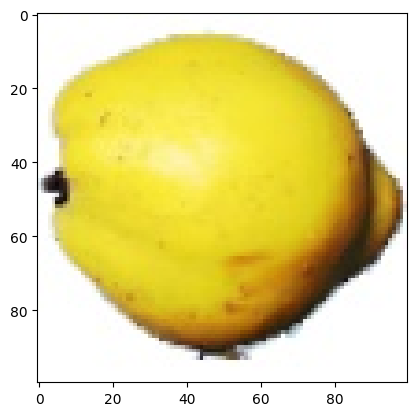

In [15]:
img = load_img(train_path + "Quince/r_299_100.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [16]:
img = img_to_array(img)
img.shape

(100, 100, 3)

In [17]:
model = Sequential()
model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(81, activation = "softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 32)       

In [18]:
model.compile(loss="categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 41322 images belonging to 81 classes.
Found 13876 images belonging to 81 classes.


In [20]:
model_saved=model.fit( train_generator,batch_size=32,epochs=2)

Epoch 1/2
1292/1292 [==============================] - 1776s 1s/step - loss: 2.5177 - accuracy: 0.3357
Epoch 2/2
1292/1292 [==============================] - 1063s 823ms/step - loss: 0.5445 - accuracy: 0.8253


KeyError: 'val_loss'

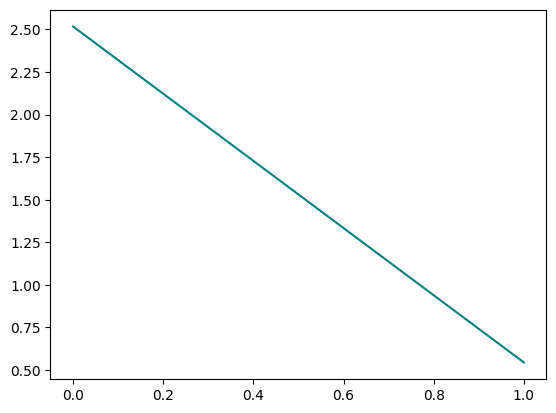

In [28]:
fig = plt.figure()
plt.plot(model_saved.history['loss'], color='teal', label='loss')
plt.plot(model_saved.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

KeyError: 'val_accuracy'

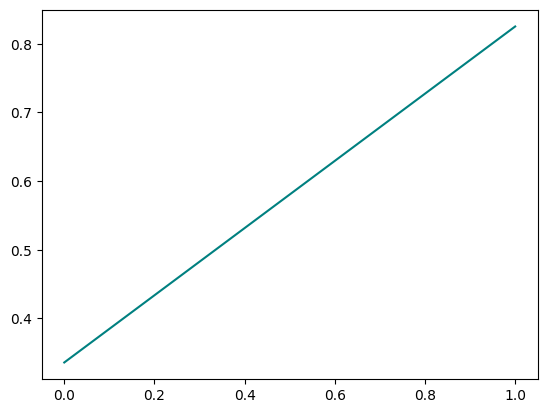

In [29]:
fig = plt.figure()
plt.plot(model_saved.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_saved.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [1]:
model = load_model(os.path.join('models','Fruitmodel1.h5'))

NameError: name 'load_model' is not defined

In [30]:
from keras.metrics import Precision, Recall, BinaryAccuracy

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
test = test_generator.as_numpy_iterator()

AttributeError: 'DirectoryIterator' object has no attribute 'as_numpy_iterator'

In [32]:

yhat = model.predict(X)
pre.update_state(y, yhat)
re.update_state(y, yhat)
acc.update_state(y, yhat)

AttributeError: 'DirectoryIterator' object has no attribute 'as_numpy_iterator'

In [21]:
from keras.models import load_model
model.save(os.path.join('models',"Fruitmodel1.h5"))

In [22]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [26]:
test_generator.classes[1387]

8

In [27]:
predictions = probability_model.predict(test_generator)

 71/434 [===>..........................] - ETA: 5:17

KeyboardInterrupt: 

In [ ]:
b=predictions[13876]
print(b)


[0.01212161 0.01211919 0.01211919 0.01211919 0.01211919 0.01211919
 0.01212189 0.01211919 0.01211919 0.0121195  0.01263935 0.01211919
 0.01211919 0.01211928 0.01211947 0.01211988 0.01211919 0.01211919
 0.01212544 0.01211919 0.01211919 0.01211919 0.01211919 0.01211919
 0.0121729  0.01221356 0.01211919 0.01211919 0.01211995 0.01211919
 0.01211919 0.01211919 0.01222428 0.01212467 0.0121192  0.01211919
 0.01211921 0.01211919 0.01212263 0.0121213  0.01220868 0.01211919
 0.01211919 0.01223065 0.01211919 0.01211932 0.01211919 0.01211919
 0.0121305  0.01213393 0.01211938 0.01211919 0.02882395 0.0121192
 0.01211919 0.01211919 0.01211919 0.01211919 0.01211919 0.01258103
 0.01211951 0.01211919 0.01211931 0.01211919 0.01211919 0.01211919
 0.01211922 0.01211919 0.01211919 0.01211919 0.0121192  0.01211919
 0.01211919 0.01226949 0.01211964 0.0121192  0.01212069 0.01211919
 0.01212031 0.01211919 0.01211919]


In [ ]:
np.argmax(b)

52

In [ ]:
import os

folder = 'fruits-360/Test'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders[np.argmax(b)])

Peach
